In [1]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [3]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 8.2 MB/s 


In [4]:
# Data manipulation and plotting modules
import os
import pandas as pd

# Data pre-processing
# Data splitting and model parameter search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from catboost import CatBoostClassifier

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

In [5]:
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
# For plotting
import matplotlib.pyplot as plt

In [7]:
# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [8]:
# From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")

In [11]:
# To read first 5 rows of train data file
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,0,0,0,0,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,0,0,0,0,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,0,0,0,0,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,0,0,0,0,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,0,0,0,0,9.84,14.395,75,0.0,0,1,1


In [12]:
# To check train data file total columns and rows
print("\n Shape")
data.shape                # 10886, 12)

#To check total columns
print("\n\n Columns")
data.columns.values      
print("\n")

#To check Data types
print("\n\nData types")                        
data.dtypes.value_counts()  
print("\n")
data.head(3)


 Shape


(10886, 12)



 Columns


array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype=object)





Data types


int64      8
float64    3
object     1
dtype: int64

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,0,0,0,0,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,0,0,0,0,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,0,0,0,0,9.02,13.635,80,0.0,5,27,32


In [13]:
data.select_dtypes(include = ['float64', 'int64'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,0,0,0,9.84,14.395,81,0.0000,3,13,16
1,0,0,0,0,9.02,13.635,80,0.0000,8,32,40
2,0,0,0,0,9.02,13.635,80,0.0000,5,27,32
3,0,0,0,0,9.84,14.395,75,0.0000,3,10,13
4,0,0,0,0,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2,0,1,0,15.58,19.695,50,26.0027,7,329,336
10882,2,0,1,0,14.76,17.425,57,15.0013,10,231,241
10883,2,0,1,0,13.94,15.910,61,15.0013,4,164,168
10884,2,0,1,0,13.94,17.425,61,6.0032,12,117,129


In [14]:
data['count'] = pd.qcut(data['count'],               # Equal interval cuts between min and max
                       2,                       # two cuts
                       labels=["High", "low"]    
                       )

In [15]:
# We do not need datatime column
data.drop(['datetime'], axis=1,inplace=True)

In [16]:
# To check null values
data.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
#  Divide data into predictors and target
#     First 10 columns are predictors
X = data.iloc[ :, 0:10]
X.head(2)

# 11st column is target
print("\n\nTarget,y, values")
y = data.iloc[ : , 10]
y.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,0,0,0,0,9.84,14.395,81,0.0,3,13
1,0,0,0,0,9.02,13.635,80,0.0,8,32




Target,y, values


0    High
1    High
2    High
3    High
4    High
Name: count, dtype: category
Categories (2, object): ['High' < 'low']

In [18]:
#  Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )


X_train.shape        
X_test.shape         
y_train.shape        
y_test.shape  

(7075, 10)

(3811, 10)

(7075,)

(3811,)

In [19]:
#Creating pipeline
#Pipe using XGBoost
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# Instantiate Pipeline object
pipe_xg = Pipeline(steps_xg)

In [20]:
# Grid Search code to discover best pipeline parameters
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [21]:
# Deifne dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [5,10],
              'xg__booster': ['gbtree','gblinear']
              }    

In [22]:
#  Define revised dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [5,6],
 
              'pca__n_components' : [5,10],
               }                               # Total: 2 * 2 * 2 * 2

In [23]:
#### Instantiating GridSearchCV class
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [24]:
from time import sleep
from time import *             #meaning from time import EVERYTHING
import time

In [25]:
 # Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60 



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(n_jobs=3,
                                                      silent=False))]),
             n_jobs=2,
             param_grid={'pca__n_components': [5, 10],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [5, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

0.15303436915079752

In [26]:
# Make predictions using the best returned model
y_pred = clf.predict(X_test) 

In [27]:
# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0 



--Accuracy Score--



94.96195224350565

In [28]:
# 7.6 Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)



--Confusion Matrix--



array([[1831,   78],
       [ 114, 1788]])



--F1 Score 


0.9496195224350564



--ROC curve--



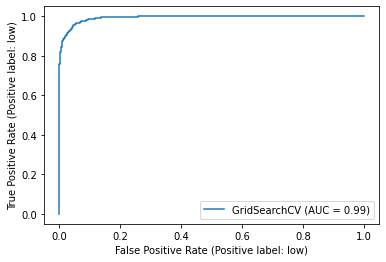

In [29]:
# F1 score
print("\n\n--F1 Score ")
f1_score(y_test,y_pred,average ='micro')      



# 7.8 ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [30]:
#  Get feature importances from GridSearchCV best fitted 'xg' model
clf.best_estimator_.named_steps["xg"].feature_importances_.shape


print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_

(10,)



---Feature importances---



array([0.28444389, 0.19524625, 0.14642914, 0.04132926, 0.06553205,
       0.14413698, 0.04709429, 0.01787759, 0.03431024, 0.02360032],
      dtype=float32)

In [31]:
colnames = X.columns.tolist()

In [32]:
#  Create a dataframe of feature importances
#      with names of columns and sorted by feature-imp
imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')


df_imp

,imp
windspeed,0.017878
registered,0.023600
casual,0.034310
weather,0.041329
humidity,0.047094
temp,0.065532
atemp,0.144137
workingday,0.146429
holiday,0.195246
season,0.284444


In [33]:
#  First five columns with least feature importance are:
list(df_imp.index.values[:5])

['windspeed', 'registered', 'casual', 'weather', 'humidity']

In [34]:
# Let us drop these from X_train and X_test
Xtrain = X_train.drop(columns = list(df_imp.index.values[:5]))
Xtest = X_test.drop(columns = list(df_imp.index.values[:5]))

# Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            # pipeline object
                      parameters,         # possible parameters
                      n_jobs = 2,         # USe parallel cpu threads
                      cv =3 ,             # No of folds
                      verbose =2,         # Higher the value, more the verbosity
                      scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                      refit = 'roc_auc'   # Those which maximise auc
                     )

           
start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60  

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(n_jobs=3,
                                                      silent=False))]),
             n_jobs=2,
             param_grid={'pca__n_components': [5, 10],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [5, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=2)

0.08235040505727133

In [35]:
# Make predictions
y_pred_dr = clf_dr.predict(Xtest)

In [36]:
# F1 score
f1_score(y_test,y_pred_dr, average ='micro')      
     
f1_score(y_test,y_pred, average ='micro')     


0.7095250590396222

0.9496195224350564

**bold text**
Random Search code to discover best pipeline parameters
---



In [37]:
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

In [38]:
##################### EE. Randomized Search #################

# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(8,10)}

In [39]:
# Tune parameters using random search
#     Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [40]:
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   

Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBClassifier(n_jobs=3,
                                                            silent=False))]),
                   n_iter=4, n_jobs=2,
                   param_distributions={'pca__n_components': range(8, 10),
                                        'xg__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4c05279410>,
                                        'xg__max_depth': range(3, 10),
                                        'xg__n_estimators': range(50, 300)},
                   refit='roc_auc', scoring=['roc_auc', 'accuracy'], verbose=1)

0.12628222306569417

In [41]:
# Evaluate
f"Best score: {rs.best_score_} " ;print()           
f"Best parameter set: {rs.best_params_} " ; print()


#  Make predictions from the best returned model
y_pred = rs.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      
f"f1 score: {f1_score(y_test,y_pred,average ='micro') }" ; print()    

'Best score: 0.9960374558790934 '

"Best parameter set: {'pca__n_components': 8, 'xg__learning_rate': 0.23545970982692455, 'xg__max_depth': 5, 'xg__n_estimators': 222} "

'Accuracy: 96.4576226712149'

'f1 score: 0.964576226712149'

# Cross Validation

In [42]:
# Cross-validation is a more reliable validation technique than just one train/test split. 
# Here we'll resort to ShuffleSplit to create 5 70%/30% splits
from sklearn.model_selection import ShuffleSplit, KFold
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

In [43]:

from sklearn.model_selection import cross_val_score


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#We'll train 2 versions of the RandomForestClassifier model - first with default capacity (trees are not limited in depth), 
#second - with min_samples_leaf=3, i.e. each leave is obliged to have at least 3 instances.
#%%time
model_rf1 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   max_depth=None, random_state=17)

# calcuate ROC-AUC for each split
cv_scores_rf1 = cross_val_score(model_rf1, X, y, cv=cv, scoring='roc_auc')

In [46]:
model_rf2 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   min_samples_leaf=3, random_state=17)

cv_scores_rf2 = cross_val_score(model_rf2, X, y, cv=cv, 
                                scoring='roc_auc', n_jobs=-1)

In [47]:
#The result returned by cross_val_score is an array with metric values (ROC-AUC) for each split:
cv_scores_rf1

array([0.99996587, 0.99997   , 0.99987306, 0.99994111, 0.99994544])

In [48]:
cv_scores_rf2

array([0.99995912, 0.99996962, 0.9998845 , 0.99992611, 0.99993587])

In [49]:
#compare average ROC-AUC among all splits for both models.
print('Model 1 mean score:', cv_scores_rf1.mean())
print('Model 2 mean score:', cv_scores_rf2.mean())

Model 1 mean score: 0.9999390974747655
Model 2 mean score: 0.9999350468554032


# Structure

In [50]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 

In [51]:
#  Columns in num_data that are either discrete (with few levels)
#     or numeric
cols=['season', 'holiday','workingday','weather',
      'temp','atemp', 'humidity','windspeed','casual','registered','count']

In [52]:
# Create an instance of StandardScaler object
ss = StandardScaler()
le= LabelEncoder()

In [53]:
                                      # Create copy of DataFrame
data['count']= le.fit_transform(data['count'])               # Transform boolean to integer


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [55]:
#  Use fit and transform method
nc = ss.fit_transform(data.loc[:,cols])

In [56]:
# Transform numpy array back to pandas dataframe
#        as we will be using pandas plotting functions
nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,-1.34988,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,-0.998348
1,-1.34988,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,-0.998348


In [57]:
#  Add/overwrite few columns that are discrete
#        These columns were not to be scaled
nc['season'] = data['season']
nc['holiday'] = data['holiday']
nc['workingday'] = data['workingday']
nc['weather'] = data['weather']
nc['count'] = data['count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with data')

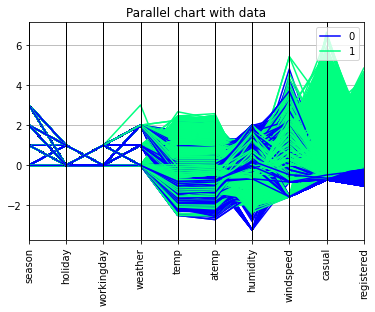

In [58]:
# Parallel coordinates chart
fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc,
                                 'count',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with data")

Text(0.5, 1.0, 'Andrews plots with  data')

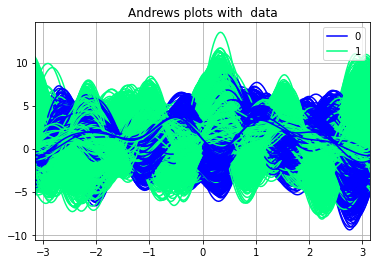

In [59]:
# Andrews charts
fig3 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'count',
                           colormap = 'winter')

plt.title("Andrews plots with  data")

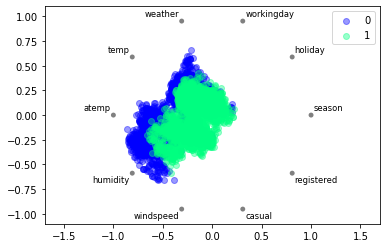

In [60]:
#  Radviz plot
fig5 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='count',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )